Вивантажую дата сет та виконую **обов'язкові завдання**:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("ucu_hw_2_app_data.csv", sep = ';', index_col='id')
df

,customer_id,registration,onboarding,completed_profile,count_events,is_male,channel,setup date,subscription
id,,,,,,,,,
0,100000,1,1,1,6,1,1,2022-01-08,1
1,100001,1,1,1,0,0,1,2022-01-05,0
2,100002,1,1,1,10,0,3,2022-01-25,1
3,100003,1,1,1,0,1,1,2022-01-11,0
4,100004,0,0,0,0,0,2,2022-01-21,0
...,...,...,...,...,...,...,...,...,...
99995,199995,1,1,1,0,0,3,2022-01-23,0
99996,199996,1,1,1,0,1,3,2022-01-08,0
99997,199997,1,1,1,0,0,3,2022-01-18,0


**1)** Будую кореляційну карту. На ній видно, що з активацією клієнта (підпискою) найбільше корелює count_events. Досить слабку кореляцію також мають реєстрація, онбординг та заповнення профілю, які середньо корелюють між собою. Однак з усіх трьох перерахованих дій найбільший вплив на підписку у онбордингу (після кількості тренувань), що вказує на важливість цього кроку для подальшої покупки

<AxesSubplot:>

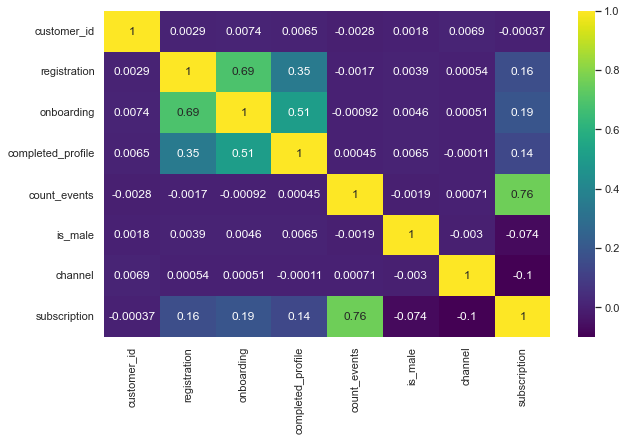

In [7]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(df.corr(),  cmap = 'viridis', annot = True)

Будую описову статистику дата сета. Гістограма вказує на сильно зміщений ліворуч розподіл даних, який вплинув на всі основні міри центральної тенденції, які тепер близькі до 0. Це говорить про те, що більшість клієнтів, встановивши додаток, навіть не тренувалася, тому 75% даних покриваются 2-ма тренуваннями

<AxesSubplot:>

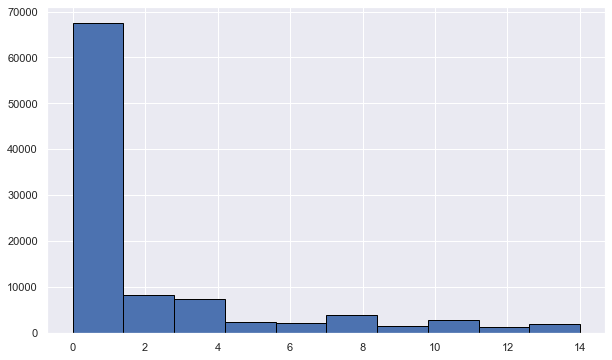

In [8]:
df['count_events'].hist(figsize=(10, 6), edgecolor='black', linewidth=1)

In [9]:
df['count_events'].describe()

count    100000.00000
mean          2.02176
std           3.30112
min           0.00000
25%           0.00000
50%           0.00000
75%           2.00000
max          14.00000
Name: count_events, dtype: float64

Проведемо аналогічний аналіз тільки для клієнтів, які здійснили покупку. Розподіл більше схожий на рівномірний, проте найбільшу кількість покупок здійснили клієнти, які тренувались 6 разів. 75% відсотків даних покривають кількість кастомірів, які зробили 10 занять

<AxesSubplot:>

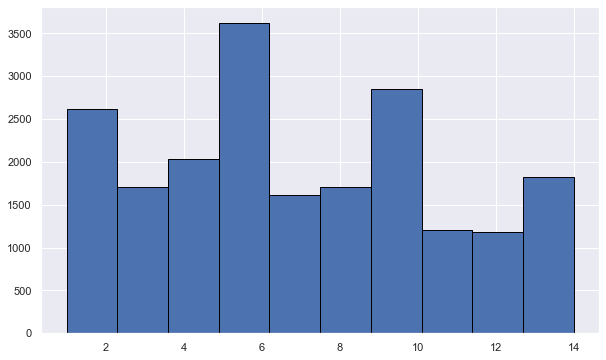

In [10]:
df[df['subscription'] == 1]['count_events'].hist(figsize=(10, 6), edgecolor='black', linewidth=1)

In [11]:
df[df['subscription'] == 1]['count_events'].describe()

count    20373.000000
mean         6.953370
std          3.668309
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         14.000000
Name: count_events, dtype: float64

**2)** Розраховую вартість кастомера (CAC) для кожного каналу. Для цього порахуємо кількість клієнтів на кожному каналі (CA) та поділимо їх на вартість кожного каналу (MC)
$$ CAC = \frac{MC}{CA} $$

In [13]:
# задаю словник каналу та його вартості
dict_channel = {1:830000, 2:180000, 3:210000}
# агрегую дані по 3м каналам
df2 = df.groupby('channel').agg(
    involved_customer = ('customer_id', 'count'),
    signed_customers = ('subscription', 'sum'),
).reset_index()
# розраховую метрики
df2['efficiency, %'] = round((df2['signed_customers'] / df2['involved_customer']) * 100, 2)
df2['CAC'] = df2.apply(lambda x: round(dict_channel[x['channel']] / x['involved_customer'], 2), axis=1)
df2

,channel,involved_customer,signed_customers,"efficiency, %",CAC
0,1,60007,14393,23.99,13.83
1,2,20241,3024,14.94,8.89
2,3,19752,2956,14.97,10.63


З отриманих результатів у таблиці помітно, що незважаючи на високу ціну за клієнта, найефективнішим виявився перший канал, що приніс найбільшу кількість активованих клієнтів, які купили підписку. У двох інших каналів % ефективності виявився приблизно однаковий, про що можна сказати, що з них найбільш вигідним був 2-й канал з найменшою вартістю за клієнта

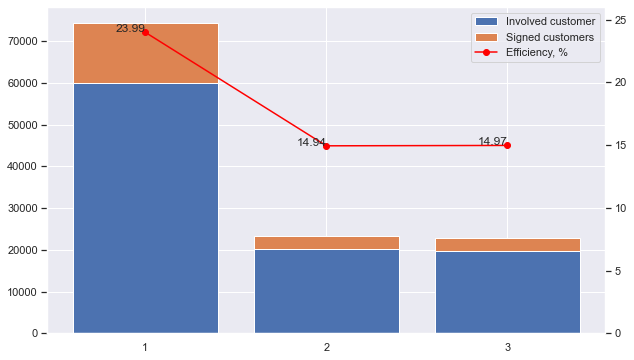

In [14]:
fig, ax1 = plt.subplots(figsize=(10, 6))
# задаю вісь абсцис
x = ['1', '2', '3']

# будую стовпчикову діаграму
ax1.bar(x, df2['involved_customer'], label='Involved customer')
ax1.bar(x, df2['signed_customers'], bottom=df2['involved_customer'], label='Signed customers')

# додаю лінійний графік з масштабуванням від 0
ax2 = ax1.twinx()
ax2.set_ylim(0, max(df2['efficiency, %']) + 2)
ax2.plot(x, df2['efficiency, %'], marker='o', color='red', label='Efficiency, %')

# додаю значення лінійного графіка
for i, value in enumerate(df2['efficiency, %']):
    ax2.annotate(str(value), xy=(i, value), xytext=(i, value), ha='right')

# додаю єдину легенду
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)
ax2.grid(False)
plt.show()

**3)** Розглянемо всі можливі комбінації цих трьох дій та подивимося на відсоток підписаних клієнтів (% ефективності). Звичайно, найвищий відсоток конверсії клієнтів виявився у категорії, що виконала всі 3 дії і найменший відсоток у тих, хто не зробив нічого. Однак, можна помітити важливість онбордингу, тому що в порівнянні тільки реєстрації з реєстрацією та онбордингом, спостерігається значний відрив (з 8.7% до 21.12%), що говорить про важливість більшого просування цього кроку клієнтам. При цьому подальше заповнення профілю впливає на конверсію лише на 4.5%

Ці висновки також підтверджує раніше побудована кореляційна карта, яка показує найбільший коефіцієнт саме у онбордингу.

In [15]:
def action_func(sample):
    if sample == '100':
        return 'registration only'
    elif sample == '110':
        return 'registration and onboarding'
    elif sample == '111':
        return 'registration, onboarding and completed profile'
    else:
        return 'nothing'

df3 = df.copy()
# додаю нове поле з описом типу дії (типи описані у функції)
df3['action_group_id'] =  df3['registration'].astype(str).str.cat([df3['onboarding'].astype(str), df3['completed_profile'].astype(str)])
df3['action_group'] = df3['action_group_id'].apply(lambda x: action_func(x))
# агрегую дані по новим типам дії
df_action = df3.groupby('action_group').agg(
    involved_customer = ('customer_id', 'count'),
    signed_customers = ('subscription', 'sum'),
).reset_index()
# розраховую відсоток підписаних клієнтів
df_action['efficiency, %'] = round((df_action['signed_customers'] / df_action['involved_customer']) * 100, 2)
df_action = df_action.sort_values('involved_customer', ascending=False)
df_action

,action_group,involved_customer,signed_customers,"efficiency, %"
3,"registration, onboarding and completed profile",52566,13459,25.60
1,registration and onboarding,28482,6020,21.14
0,nothing,9942,113,1.14
2,registration only,9010,781,8.67


Зображаю отримані результати графічно

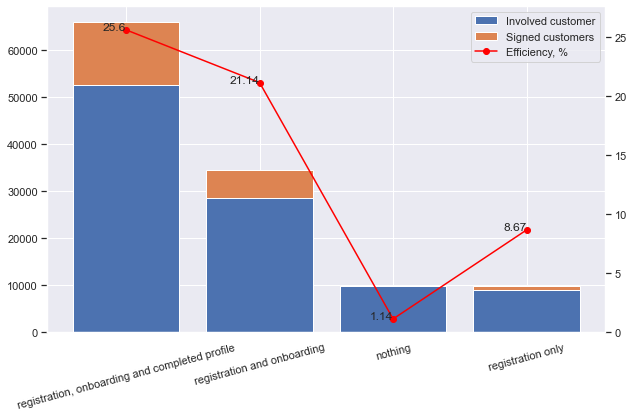

In [16]:
fig, ax1 = plt.subplots(figsize=(10, 6))
x = df_action['action_group']

# будую стовпчикову діаграму
ax1.bar(x, df_action['involved_customer'], label='Involved customer')
ax1.bar(x, df_action['signed_customers'], bottom=df_action['involved_customer'], label='Signed customers')

# додаю лінійний графік з масштабуванням від 0
ax2 = ax1.twinx()
ax2.set_ylim(0, max(df_action['efficiency, %']) + 2)
ax2.plot(x, df_action['efficiency, %'], marker='o', color='red', label='Efficiency, %')

# додаю значення лінійного графіка
for i, value in enumerate(df_action['efficiency, %']):
    ax2.annotate(str(value), xy=(i, value), xytext=(i, value), ha='right')
    
# додаю єдину легенду   
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)

ax1.set_xticks(range(len(x)))
ax1.set_xticklabels(x, rotation=15)
ax2.grid(False)
plt.show()

**4)** Досліджую як дата залучення клієнта впливає на його подальшу реєстрацію. Для цього аналогічним способом розраховую загальну кількість клієнтів, зареєстрованих клієнтів та % ефективності у розрізі дати.

In [18]:
df4 = df.groupby('setup date').agg(
    involved_customer = ('customer_id', 'count'),
    signed_customers = ('subscription', 'sum'),
).reset_index()
df4['efficiency, %'] = round((df4['signed_customers'] / df4['involved_customer']) * 100, 2)
df4

,setup date,involved_customer,signed_customers,"efficiency, %"
0,2022-01-01,3219,908,28.21
1,2022-01-02,3210,889,27.69
2,2022-01-03,3148,854,27.13
3,2022-01-04,3180,839,26.38
4,2022-01-05,3169,866,27.33
5,2022-01-06,3259,876,26.88
6,2022-01-07,3306,704,21.29
7,2022-01-08,3320,676,20.36
8,2022-01-09,3208,717,22.35
9,2022-01-10,3258,678,20.81


Візуалізую отримані агреговані дані і стає помітно, що % ефективності поступово падає протягом усього проміжку часу

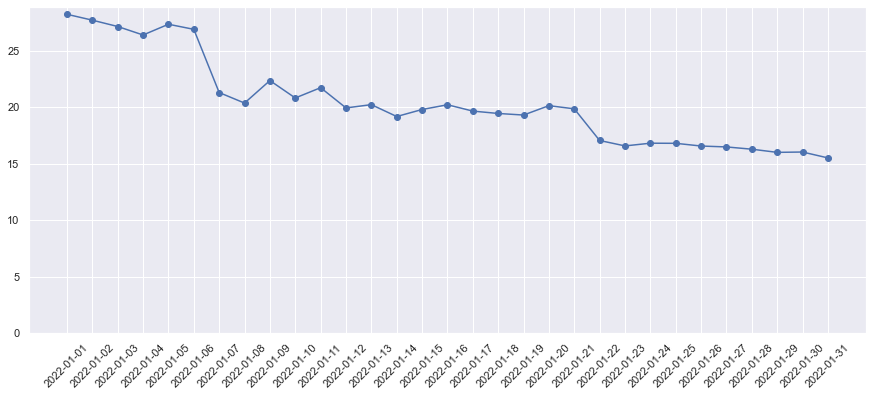

In [19]:
plt.figure(figsize=(15, 6))
x = df4['setup date']
plt.plot(x, df4['efficiency, %'], marker='o')
plt.xticks(x, rotation=45)
plt.ylim(0)
plt.show()

Для більшої наочності додаю лінійний тренд графіка, на якому більш показово помітно падіння з 28% до 15%.

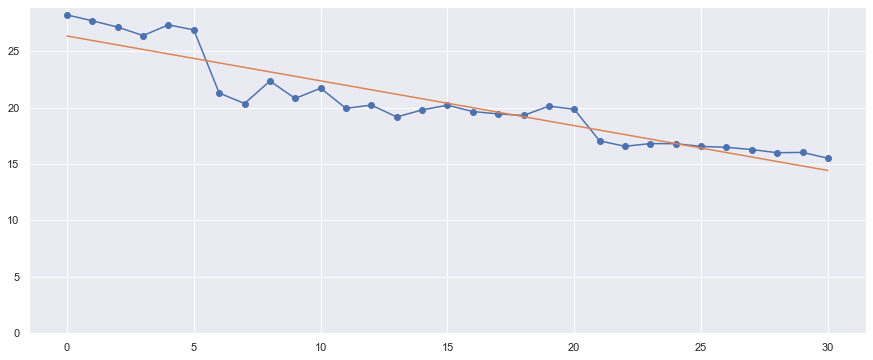

In [20]:
plt.figure(figsize=(15, 6))
x = range(0, len(df4['setup date']))
y = df4['efficiency, %'].values

# побудова лінійного графіка
plt.plot(x, y, marker='o')

# розрахунок коефіцієнтів лінійної регресії
slope, intercept = np.polyfit(x, y, 1)

# побудова тренду
trend = intercept + slope * x
plt.plot(x, trend)

plt.ylim(0)
plt.show()


**5)** Досліджую AHA момент за допомогою кореляційного аналізу та визначаю цільову дію для активації клієнта.
Для цього задаю 14 цільових дій від >= 1 до >= 14 і рахую для кожного булевого поля коефіцієнт кореляції з підпискою

In [21]:
df5 = df.copy()
dict_corr = {}
# додаю нові поля та розраховую коефіцієнти кореляції
for num in range (1, 15):
    category = '>='+str(num)
    df5[category] = df5['count_events'].apply(lambda x: 1 if x >= num else 0)
    dict_corr[category] = round(df5['subscription'].corr(df5[category]), 2)
df5

,customer_id,registration,onboarding,completed_profile,count_events,is_male,channel,setup date,subscription,>=1,...,>=5,>=6,>=7,>=8,>=9,>=10,>=11,>=12,>=13,>=14
id,,,,,,,,,,,,,,,,,,,,,
0,100000,1,1,1,6,1,1,2022-01-08,1,1,...,1,1,0,0,0,0,0,0,0,0
1,100001,1,1,1,0,0,1,2022-01-05,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100002,1,1,1,10,0,3,2022-01-25,1,1,...,1,1,1,1,1,1,0,0,0,0
3,100003,1,1,1,0,1,1,2022-01-11,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100004,0,0,0,0,0,2,2022-01-21,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,1,1,1,0,0,3,2022-01-23,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,199996,1,1,1,0,1,3,2022-01-08,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,199997,1,1,1,0,0,3,2022-01-18,0,0,...,0,0,0,0,0,0,0,0,0,0


Далі розраховую розмір вибірки та метрики PPV/NPV. Для цього агрегую таблицю за кількістю тренувань та розраховую кумулятивні суми для активованих кастомірів та не активованих. Для тих, хто виконав цільову дію – це зворотна куммулятивна сума, для тих, хто ні – пряма. 4 отримані комбінації підставляю у формули PPV та NPV.

In [22]:
# агрегую дані 
aha_df = df5.groupby('count_events').agg(
    sample = ('customer_id', 'count'),
    active_user = ('subscription', 'sum'),
).reset_index()

# розраховую відповідні кумулятивні сумми для кожної категорії
aha_df['no_active_user'] = aha_df['sample'] - aha_df['active_user']
aha_df['event_category'] = aha_df['count_events'].apply(lambda x: ">=" + str(x))
aha_df['size_sample'] = aha_df['sample'].sum() - aha_df['sample'].cumsum() + aha_df['sample']
aha_df['+_active_users'] = aha_df['active_user'].sum() - aha_df['active_user'].cumsum() + aha_df['active_user']
aha_df['+_no_active_users'] = aha_df['no_active_user'].sum() - aha_df['no_active_user'].cumsum() + aha_df['no_active_user']
aha_df['-_active_users'] = aha_df['active_user'].cumsum() - aha_df['active_user']
aha_df['-_no_active_users'] = aha_df['no_active_user'].cumsum() - aha_df['no_active_user']

# рахую PPV та NPV
aha_df['PPV, %'] = round((aha_df['+_active_users'] / (aha_df['+_active_users'] + aha_df['+_no_active_users'])) * 100, 2)
aha_df['NPV, %'] = round((aha_df['-_no_active_users'] / (aha_df['-_no_active_users'] + aha_df['-_active_users'])) * 100, 2)
aha_df = aha_df[aha_df ['count_events'] > 0]
aha_df

,count_events,sample,active_user,no_active_user,event_category,size_sample,+_active_users,+_no_active_users,-_active_users,-_no_active_users,"PPV, %","NPV, %"
1,1,16879,790,16089,>=1,49304,20373,28931,0,50696,41.32,100.00
2,2,8401,1829,6572,>=2,32425,19583,12842,790,66785,60.39,98.83
3,3,4151,1712,2439,>=3,24024,17754,6270,2619,73357,73.90,96.55
4,4,3388,2031,1357,>=4,19873,16042,3831,4331,75796,80.72,94.59
5,5,2477,1808,669,>=5,16485,14011,2474,6362,77153,84.99,92.38
6,6,2275,1818,457,>=6,14008,12203,1805,8170,77822,87.11,90.50
7,7,1928,1614,314,>=7,11733,10385,1348,9988,78279,88.51,88.68
8,8,1984,1707,277,>=8,9805,8771,1034,11602,78593,89.45,87.14
9,9,1683,1454,229,>=9,7821,7064,757,13309,78870,90.32,85.56
10,10,1576,1394,182,>=10,6138,5610,528,14763,79099,91.40,84.27


Додаю коефіцієнт кореляції та залишаю всі необхідні поля для аналізу. Оскільки найкращий результат визначається максимізацією всіх метрик, то цільовою дією можна вибрати більше 4-х тренувань

In [3]:
full_aha = aha_df.merge(pd.DataFrame.from_dict(dict_corr, orient='index').reset_index().rename(columns={'index':'event_category', 0: 'coef_corr'}), on='event_category', how='left')[['event_category', 'coef_corr', 'PPV, %', 'NPV, %', 'size_sample']]
full_aha

,event_category,coef_corr,"PPV, %","NPV, %",size_sample
0,>=1,0.51,41.32,100.00,49304
1,>=2,0.69,60.39,98.83,32425
2,>=3,0.75,73.90,96.55,24024
3,>=4,0.75,80.72,94.59,19873
4,>=5,0.71,84.99,92.38,16485
5,>=6,0.67,87.11,90.50,14008
6,>=7,0.62,88.51,88.68,11733
7,>=8,0.57,89.45,87.14,9805
8,>=9,0.51,90.32,85.56,7821
9,>=10,0.45,91.40,84.27,6138


**Додаткові завдання:**

**1)** Будую прогнозування % підписок на 7 днів інструментом SARIMA для прогнозування часових рядів. Сезонність була визначена в 7 днів, гіперпараметри було взято базові. Результат наданий графічно і він повторює раніше виявлений тренд, що падає, % підписок.

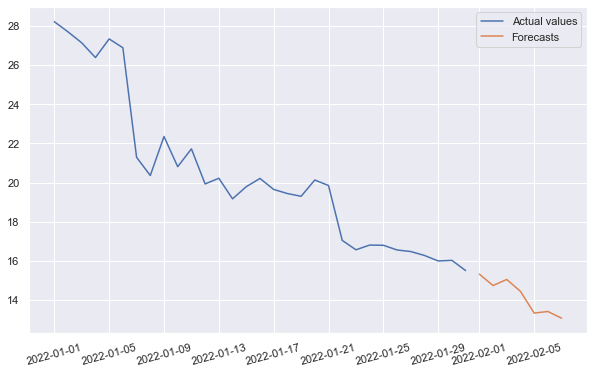

In [24]:
import statsmodels.api as sm

# опрацьовую раніше розраховані агреговані дані в розрізі дати
train_set = df4[['setup date', 'efficiency, %']].copy()
train_set.index = pd.to_datetime(train_set['setup date'])
train_set = train_set.drop(columns=['setup date'], axis=1)
train_set = train_set.asfreq("D")

# будую модель з заданними гіперпараметрами
mod = sm.tsa.statespace.SARIMAX(train_set,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
# навчаю модель
results = mod.fit()
# прогнозую на 7 днів
pred = results.predict(start='2022-02-01', end='2022-02-07')
# відображаю результат графічно
plt.plot(train_set, label='Actual values')
plt.plot(pred, label='Forecasts')
plt.xticks(rotation=15)
plt.legend()
plt.show()

**2)** Опис цільових персон продукту:
* Олена, 28 років. Веде здоровий спосіб життя, стежить за харчуванням та любить пробувати нові види спорту. Вона зацікавилася йогою лише недавно, тому їй, як новачку, важливо знайти докладну пошагову інструкцію для кожної пози, щоб отримати максимальну користь, не виходячи з дому. Олена любить все нове, тому продукт має надати великий перелік можливих тренувань з постійним додаванням нового матеріалу. Олена має дітей, тому важливо за короткий час отримати максимальну користь з одного заняття. Вона веде блог про харчування та спорт, отже її основним каналом залучення будуть популярні соціальні мережі.


* Роман, 35 років. Працює архітектором у відомій компанії. Щоб боротися зі стресом та втомою на роботі, у вільний час вже 5 років займається йогою та є вегетаріанцем. Оскільки він вже має великий досвід тренувань, зараз він знаходиться у пошуку нових джерел знань та методик для самостійного вдосконалення. На соціальні мережі у нього не вистачає часу, тому його ідеальним джерелом залучення буде контекстна та таргетована реклама на різних сайтах.

**3)** Аналізую чи є стистично значущими відмінності у конверсії трьох каналів залучення клієнтів. Отримую 3 попарні комбінації з 3х каналів та використовую chi square test для отримання p-value та визначення статистичної значущості. Результати наведені нижче

In [26]:
from itertools import combinations
from scipy.stats import chi2_contingency

categories = df2['channel']

# отримання всіх унікальних комбінацій із двох елементів
combinations_2 = list(combinations(categories, 2))

# розрахунок p-value для кожної пари
for i in combinations_2:
    observed = df2.loc[df2['channel'].isin(i), ['involved_customer', 'signed_customers']]
    chi2, p, dof, expected = chi2_contingency(observed)
# формування висновків
    result = 'Конверсії каналів ' + str(i[0]) + ' та ' + str(i[1])
    if p <= 0.005:
        result += " відрізняються статистично значимо: p = "
    else:
        result += " відрізняються статистично НЕ значимо: p = "
    result += str(p)
    print(result)

Конверсії каналів 1 та 2 відрізняються статистично значимо: p = 6.855997294330567e-108
Конверсії каналів 1 та 3 відрізняються статистично значимо: p = 3.641952455199955e-105
Конверсії каналів 2 та 3 відрізняються статистично НЕ значимо: p = 0.9618185915878907
